Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Letícia da Silva Macedo Alves"
COLLABORATORS = ""

---

# Lista 09 - Comparando Regressões

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Linear Regularizada para **pelo menos um** dos conjuntos de dados disponível na [seção de regressão linear múltipla](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html) da página do *Livro Understandable Statistics* de Charles Brase e Corrinne Brase. Para o conjunto de dados que escolheu, execute a regressão linear múltipla para explicar o fator $X1$ dos dados ([ver descrição de um dos conjuntos](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)) a partir dos outros fatores. 

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Diferente da lista anterior, reporte o erro quadrado médio no conjunto de teste.

In [2]:
# YOUR CODE HERE
#Imports e padrões do professor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

plt.ion()
plt.style.use('seaborn-colorblind')

O banco de dados escolhido foi o "Pressão arterial sistólica"(Systolic Blood Pressure). Ele possui 3 colunas: X1 = Pressão arterial sistólica, X2 = Idade (em anos) e X3 = Peso (em libras). Cada linha corresponde a um paciente. Sua leitura é realizada abaixo, bem como a visualização das entradas.

In [3]:
df = pd.read_csv('./dados_sanguineos.csv', sep = ";")

#Os dados originais
df

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


Abaixo também é possível visualizar a relação entre as colunas através de 2 plots. Ambos revelam, aparentemente, uma forte relação positiva (crescente) entre os dados. Isto é, quanto maior a idade ou, quanto maior o peso do paciente, maior é a pressão arterial sistólica.

Text(0, 0.5, 'Pressão arterial sistólica')

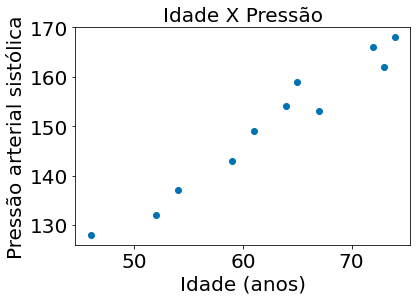

In [4]:
plt.scatter(df['X2'], df['X1'])
plt.title('Idade X Pressão')
plt.xlabel('Idade (anos)')
plt.ylabel('Pressão arterial sistólica')

Text(0, 0.5, 'Pressão arterial sistólica')

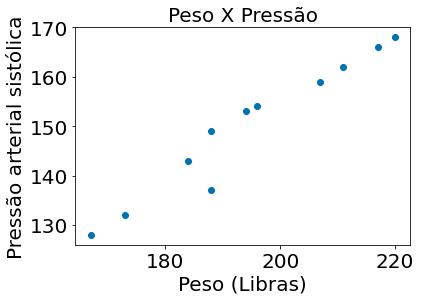

In [5]:
plt.scatter(df['X3'], df['X1'])
plt.title('Peso X Pressão')
plt.xlabel('Peso (Libras)')
plt.ylabel('Pressão arterial sistólica')

Queremos prever o fator X1 (Pressão Arterial Sistólica) a partir dos outros 2 fatores (Idade e Peso). Para isso vamos, primeiramente, analisar o desempenho de um classificador KNN Regressor (uma vez que, como é notável, nossa coluna X1 não apresenta "classes" bem definidas) e depois de uma Regressão Linear Múltipla. Abaixo defino y como o que queremos prever e X como os demais fatores.

In [6]:
X = df.copy()
X = X.drop('X1', axis=1) 
y = df['X1']

Separemos agora os conjuntos de Treino (80%) e Teste (20%) para realizar treino, teste e validação de nossos dados.

In [7]:
from sklearn.model_selection  import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2)

Z-normalizamos os dados abaixo.

In [8]:
media_treino = X_treino.mean()
desvio_treino = X_treino.std(ddof=1)

Z_treino = X_treino.copy()
Z_treino = (Z_treino - media_treino)/desvio_treino

Z_teste = X_teste.copy()
Z_teste = (Z_teste - media_treino)/desvio_treino

#Z_treino.describe()
#Z_teste.describe()

KNN

Queremos agora encontrar o classificador com maior acurácia, isto é, quero o melhor parâmetro k do treino e validação.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import cross_val_score

k_vizinhos = np.arange(1, 3)
scores = []

for k in k_vizinhos:
    modelo_knn = KNeighborsRegressor(n_neighbors = k)
    modelo_knn.fit(Z_treino.values, y_treino.values)
    score = cross_val_score(modelo_knn, Z_treino.values, y_treino.values, cv = 2)
    scores.append(score.mean())

scores

[0.48715389449558244, 0.25422878478218397]

Vemos então que, entre k=1 e k=2, k=1 parece ser o melhor. Vamos agora treinar o modelo e avaliá-lo no conjunto de teste usando k=1 e verificar as métricas obtidas.

In [10]:
from sklearn.metrics import classification_report

modelo_knn = KNeighborsRegressor(n_neighbors=1)
modelo_knn.fit(Z_treino, y_treino)

print(classification_report(y_teste, modelo_knn.predict(Z_teste), zero_division=0))

              precision    recall  f1-score   support

       128.0       0.00      0.00      0.00       0.0
       132.0       0.00      0.00      0.00       1.0
       162.0       0.00      0.00      0.00       0.0
       166.0       0.00      0.00      0.00       1.0
       168.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



Vemos então que erramos muito nas previsões. Podemos visualizar isso melhor através da matriz de confusão abaixo e no erro quadrado médio.

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, modelo_knn.predict(Z_teste)))

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [12]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_teste, modelo_knn.predict(Z_teste)))

22.666666666666668


Podemos concluir, observando esses resultados, que o modelo classificador KNN tem um desempenho ruim nessa base de dados, o erro de previsão é alto. Acredito que isso ocorre devido aos valores de X1 não serem classes (mas sim valores contínuos) e também pois o banco possui pouquíssimas entradas.

REGRESSÃO LINEAR MÚLTIPLA

Usaremos a função LinearRegression da sklearn para analisar o desempenho de uma Regressão Linear Múltipla (regularizada já pela função) para a previsão da Pressão arterial sistólica.

In [13]:
from sklearn.linear_model import LinearRegression

modelo_rl = LinearRegression()
scores = cross_val_score(modelo_rl, Z_treino.values, y_treino.values, cv=2)
modelo_rl.fit(Z_treino, y_treino)

scores

array([0.78238108, 0.66719061])

In [14]:
modelo_rl.coef_

array([7.36949179, 4.11310026])

Abaixo vemos que o coeficiente de determinação (R2) é alto para a regressão utilizada e o erro quadrado médio é baixo (se comparado ao do classiicador KNN). Isso revela que a previsão de X1 utilizando a Regressão Linear obteve bons resultados.

In [15]:
modelo_rl.score(Z_treino, y_treino) 

0.9581816739116944

In [16]:
print(mean_squared_error(y_teste, modelo_rl.predict(Z_teste)))

2.076754675386742


Explique e discuta sobre os resultados encontrados no campo abaixo.

Assim, ao realizar treino, validação e teste para ambos os modelos, observamos Regressão Linear obteve melhor desempenho (com um menor erro quadrado médio) em comparação a um classificador KNN na previsão da Pressão Arterial Sistólica através da idade e do peso dos pacientes. Como vimos nos plots "Idade X Pressão" e "Peso X Pressão", as relações são lineares, logo, é esperado que uma Regressão Linear seja uma boa opção na modelagem dos dados. 